In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!ln -s "/gdrive/My Drive/TESS Toronto emotional speech set data" "/content/TESS Toronto emotional speech set data"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
ln: failed to create symbolic link '/content/TESS Toronto emotional speech set data': File exists


In [ ]:
import os 
os.chdir('/content/drive/MyDrive/TESS Toronto emotional speech set data')

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_fear/YAF_base_fear.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_fear/YAF_bar_fear.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_fear/YAF_back_fear.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_fear/YAF_burn_fear.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_fear/YAF_beg_fear.wav']

In [ ]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/TESS Toronto emotional ...,fear
1,/content/drive/MyDrive/TESS Toronto emotional ...,fear
2,/content/drive/MyDrive/TESS Toronto emotional ...,fear
3,/content/drive/MyDrive/TESS Toronto emotional ...,fear
4,/content/drive/MyDrive/TESS Toronto emotional ...,fear


In [ ]:
df['label'].value_counts()


fear       400
angry      400
ps         400
sad        400
disgust    400
happy      400
neutral    400
Name: label, dtype: int64

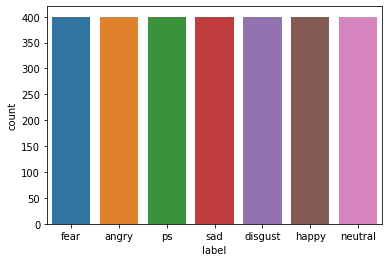

In [ ]:
sns.countplot(df['label'])


In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

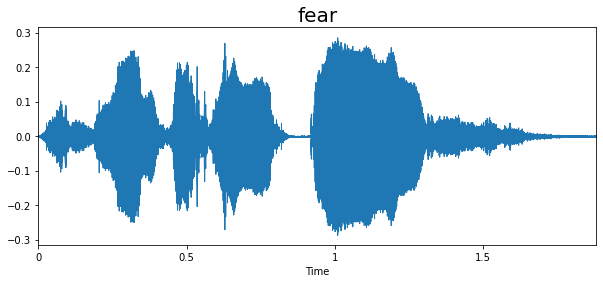

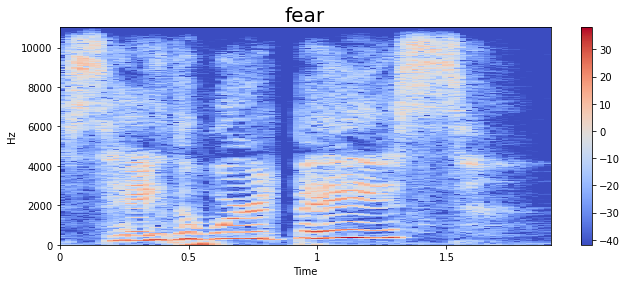

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
path
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)#To hear the audio used

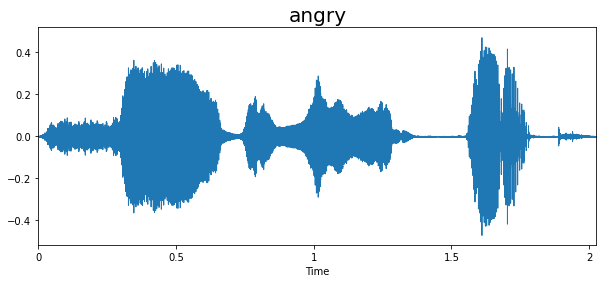

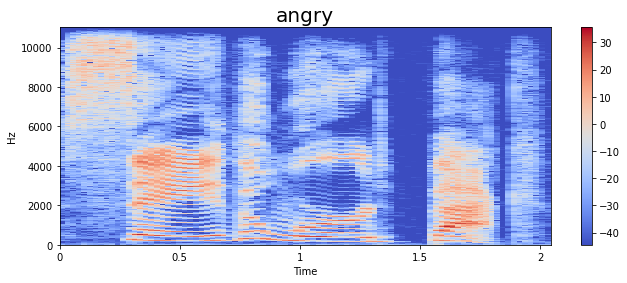

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

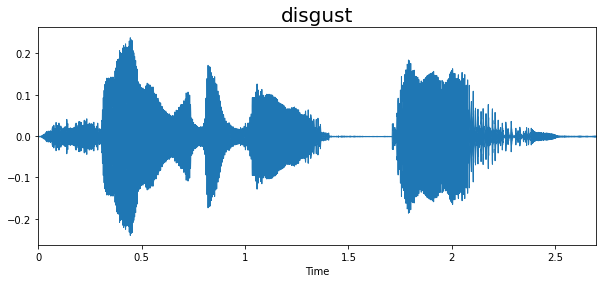

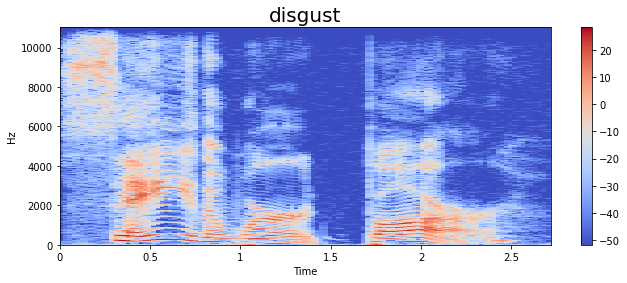

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

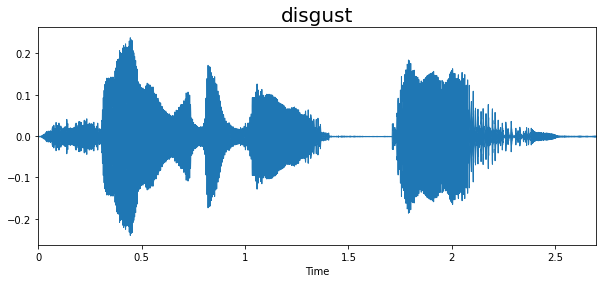

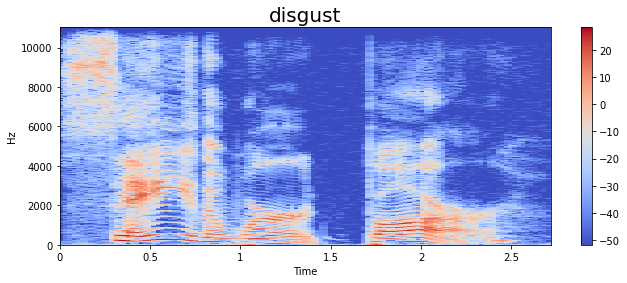

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

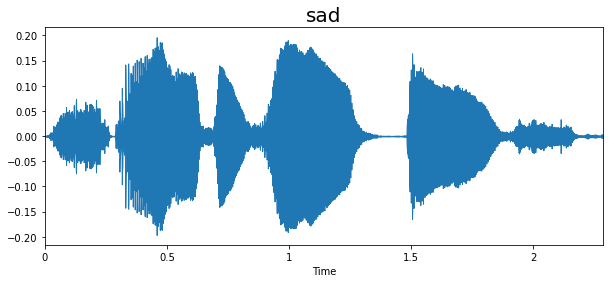

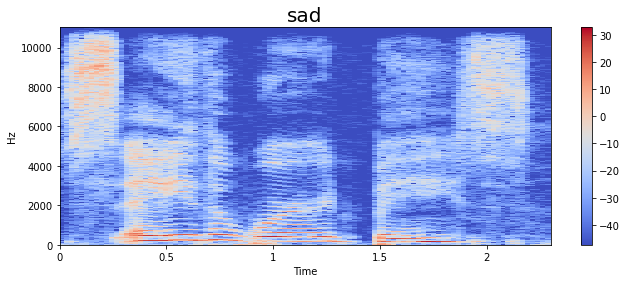

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

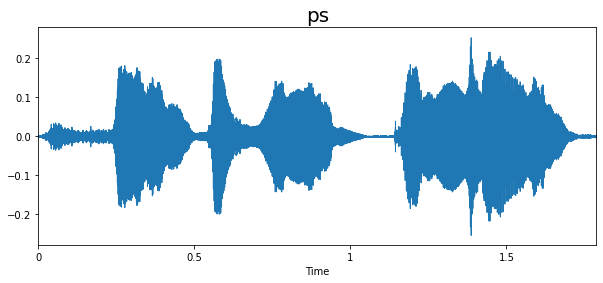

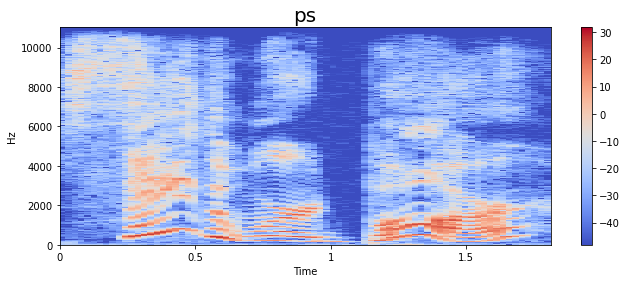

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

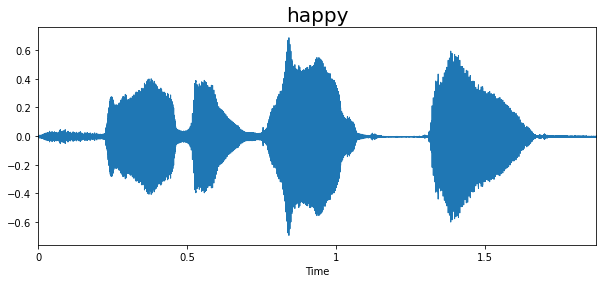

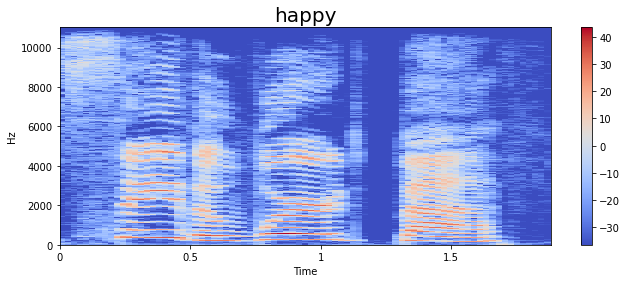

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

Feature extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])


array([-333.92062   ,   34.52865   ,  -12.691486  ,   13.72076   ,
          0.39741248,   -6.2336173 ,   -3.8561304 ,    3.267817  ,
         -8.872296  ,    9.601949  ,  -15.065756  ,    3.4599626 ,
          2.3263013 ,   -0.4014028 ,    2.429702  ,   -5.268257  ,
         -0.7518975 ,   19.047993  ,    5.7114253 ,   22.185827  ,
         12.0140705 ,    2.9703207 ,    0.90030026,   -0.6600856 ,
         -5.347191  ,    8.098718  ,   -6.2889967 ,   -2.4646366 ,
         -2.5352566 ,   -4.3032727 ,   -4.9554377 ,   -1.4295139 ,
         -4.5030103 ,    2.7767417 ,    0.71678525,    4.7106566 ,
          4.7078547 ,    4.255488  ,   -0.51183105,    4.821099  ],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))


In [ ]:
X_mfcc


0       [-333.92062, 34.52865, -12.691486, 13.72076, 0...
1       [-291.8746, 67.760765, -33.392487, -11.116656,...
2       [-291.97055, 75.62835, -30.543198, 9.002014, 3...
3       [-315.14142, 82.41332, -30.106949, -2.6869636,...
4       [-338.48026, 58.976345, -28.16451, 19.012163, ...
                              ...                        
2795    [-433.02893, 97.0214, 14.92801, -22.751167, -1...
2796    [-485.17307, 62.53684, 15.026054, 3.7160945, 2...
2797    [-454.53226, 53.692074, 14.081082, 1.5439758, ...
2798    [-431.67157, 80.79233, 6.3604226, -17.037594, ...
2799    [-443.18433, 81.223274, 10.781456, -5.210361, ...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape


(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])


In [ ]:
y = y.toarray()


In [ ]:
y.shape


(2800, 7)

Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 7)                

In [ ]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)


Epoch 1/50
35/35 [==============================] - 9s 206ms/step - loss: 1.3014 - accuracy: 0.4857 - val_loss: 1.8073 - val_accuracy: 0.4857
Epoch 2/50
35/35 [==============================] - 7s 188ms/step - loss: 0.3959 - accuracy: 0.8661 - val_loss: 2.2302 - val_accuracy: 0.5821
Epoch 3/50
35/35 [==============================] - 7s 190ms/step - loss: 0.2236 - accuracy: 0.9308 - val_loss: 1.9359 - val_accuracy: 0.5696
Epoch 4/50
35/35 [==============================] - 7s 188ms/step - loss: 0.1687 - accuracy: 0.9513 - val_loss: 2.6076 - val_accuracy: 0.5304
Epoch 5/50
35/35 [==============================] - 7s 188ms/step - loss: 0.1785 - accuracy: 0.9469 - val_loss: 2.4926 - val_accuracy: 0.5679
Epoch 6/50
35/35 [==============================] - 7s 188ms/step - loss: 0.0913 - accuracy: 0.9705 - val_loss: 3.2849 - val_accuracy: 0.5589
Epoch 7/50
35/35 [==============================] - 6s 184ms/step - loss: 0.1121 - accuracy: 0.9661 - val_loss: 2.1763 - val_accuracy: 0.5839
Epoch 

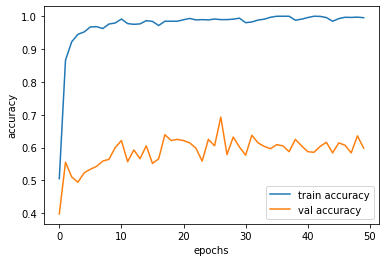

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

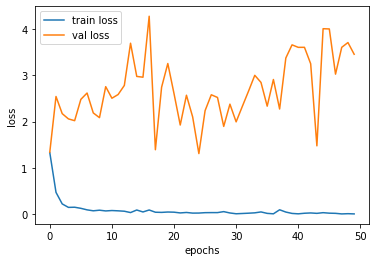

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
